In [2]:
import pandas as pd
import numpy as np

In [21]:
class SP_Dev:
    import numpy as np
    import pandas as pd
        
    def __init__(self,prob,resp):
        self.prob=prob
        self.resp=resp
        
    def Hosmer_Lemeshow(self,g):
        from scipy.stats import chi2
        df=pd.DataFrame({'prob':self.prob,'resp':self.resp})
        print("|======= Response Distribution =======|")
        print(df['resp'].value_counts())
        df.sort_values('prob',ascending=False,inplace=True)
        df['score_decile'] = pd.qcut(df['prob'], g)
        obsevents_pos = df['resp'].groupby(df.score_decile).sum()
        obsevents_neg = df['resp'].groupby(df.score_decile).count() - obsevents_pos
        expevents_pos = df['prob'].groupby(df.score_decile).sum()
        expevents_neg = df['prob'].groupby(df.score_decile).count() - expevents_pos
        cal_HL_statistics = (((obsevents_pos - expevents_pos)**2/expevents_pos) + ((obsevents_neg - expevents_neg)**2/expevents_neg)).sum()
        print("|------------------------------------|")
        print(" Hosmer- Lemeshow Statistic Value")
        print(cal_HL_statistics)
        print("|------------------------------------|")
        print(" P Value")
        p_val=1-chi2.cdf(cal_HL_statistics,8)
        print(p_val)
        print("|------------------------------------|")
            
    def Decile(self):
        df1=pd.DataFrame({'prob':self.prob,'resp':self.resp})
        df1.sort_values('prob',ascending=False,inplace=True)
        df1['score_decile'] = pd.qcut(df1['prob'], 10)
        df1.score_decile=df1.score_decile.astype('str')
        l=df1.score_decile.str.split(',',expand=True)
        l[0]=l[0].str.replace('(','')
        l[1]=l[1].str.replace(']','')
        l[0]=pd.to_numeric(l[0],errors='coerce')
        l[1]=pd.to_numeric(l[1],errors='coerce')
        df1['min_prob']=l[0]
        df1['max_prob']=l[1]
        p=np.sort(np.unique(df1.max_prob))
        df1['DEC']=0
        df1['DEC']=np.where(df1.prob<=1,1,df1['DEC'])
        df1['DEC']=np.where(df1.prob<=p[8],2,df1['DEC'])
        df1['DEC']=np.where(df1.prob<=p[7],3,df1['DEC'])
        df1['DEC']=np.where(df1.prob<=p[6],4,df1['DEC'])
        df1['DEC']=np.where(df1.prob<=p[5],5,df1['DEC'])
        df1['DEC']=np.where(df1.prob<=p[4],6,df1['DEC'])
        df1['DEC']=np.where(df1.prob<=p[3],7,df1['DEC'])
        df1['DEC']=np.where(df1.prob<=p[2],8,df1['DEC'])
        df1['DEC']=np.where(df1.prob<=p[1],9,df1['DEC'])
        df1['DEC']=np.where(df1.prob<=p[0],10,df1['DEC'])
        return(df1)
    
    def KS(self):
        d=self.Decile()
        ks=pd.pivot_table(d,index='DEC',values='resp',aggfunc=[len,sum])
        ks.columns=['N','response']
        ks['decile']=ks.index
        ks.reset_index(drop=True,inplace=True)
        ks['non_resp']=ks.N-ks.response
        ks['resp_rate']=ks.response/ks.N
        ks['non_resp_rate']=ks.non_resp/ks.N
        ks['resp_per']=ks.response/ks.response.sum()*100
        ks['non_resp_per']=ks.non_resp/ks.non_resp.sum()*100
        ks['cum_resp_per']=np.cumsum(ks.resp_per)
        ks['cum_non_resp_rate']=np.cumsum(ks.non_resp_per)
        ks['KS_value']=round((ks.cum_resp_per-ks.cum_non_resp_rate)/100,2)
        ks['Lift']=(ks.cum_resp_per/100)/(np.cumsum(ks.N)/(sum(ks.N)*1.0))
        return(ks)
    
    def Concordance(self):
        df2=pd.DataFrame({'prob':self.prob,'resp':self.resp})
        Event=df2.loc[df2.resp==1]
        Non_Event=df2.loc[df2.resp==0]
        Pairs=0
        Conc=0
        Disc=0
        Ties=0
        for i in Event.prob:
            for j in Non_Event.prob:
                Pairs+=1
                if(i>j):
                    Conc+=1
                elif(i<j):
                    Disc+=1
                else:
                    Ties+=1
        print("-----------------------------------------------------------")
        print(" Total Pairs               :", Pairs)
        print(" Percentage of Concordance :",round(Conc/Pairs*100,2),"%")
        print(" Percentage of Discordance :",round(Disc/Pairs*100,2),"%")
        print(" Percentage of Ties        :",round(Ties/Pairs*100,2),"%")
        print("-----------------------------------------------------------")                 


In [22]:
def ScoreBand(prob,train_resp,score):
    k=SP_Dev(prob,train_resp)
    new=k.Decile()
    p=np.sort(np.unique(new.max_prob))
    df3=pd.DataFrame({'p_prob':score})
    df3['DEC']=0
    df3['DEC']=np.where(df3.p_prob<=1,1,df3['DEC'])
    df3['DEC']=np.where(df3.p_prob<=p[8],2,df3['DEC'])
    df3['DEC']=np.where(df3.p_prob<=p[7],3,df3['DEC'])
    df3['DEC']=np.where(df3.p_prob<=p[6],4,df3['DEC'])
    df3['DEC']=np.where(df3.p_prob<=p[5],5,df3['DEC'])
    df3['DEC']=np.where(df3.p_prob<=p[4],6,df3['DEC'])
    df3['DEC']=np.where(df3.p_prob<=p[3],7,df3['DEC'])
    df3['DEC']=np.where(df3.p_prob<=p[2],8,df3['DEC'])
    df3['DEC']=np.where(df3.p_prob<=p[1],9,df3['DEC'])
    df3['DEC']=np.where(df3.p_prob<=p[0],10,df3['DEC'])
    return(df3)

In [23]:
class SP_Val:
    import numpy as np
    import pandas as pd
    
    def __init__(self,prob,train_resp,score,test_resp):
        self.prob=prob
        self.train_resp=train_resp
        self.score=score
        self.test_resp=test_resp
        
    def KS(self):
        d=ScoreBand(self.prob,self.train_resp,self.score)
        resp=self.test_resp
        resp.reset_index(drop=True,inplace=True)
        d['resp']=resp
        ks=pd.pivot_table(d,index='DEC',values='resp',aggfunc=[len,sum])
        ks.columns=['N','response']
        ks['decile']=ks.index
        ks.reset_index(drop=True,inplace=True)
        ks['non_resp']=ks.N-ks.response
        ks['resp_rate']=ks.response/ks.N
        ks['non_resp_rate']=ks.non_resp/ks.N
        ks['resp_per']=ks.response/ks.response.sum()*100
        ks['non_resp_per']=ks.non_resp/ks.non_resp.sum()*100
        ks['cum_resp_per']=np.cumsum(ks.resp_per)
        ks['cum_non_resp_rate']=np.cumsum(ks.non_resp_per)
        ks['KS_value']=round((ks.cum_resp_per-ks.cum_non_resp_rate)/100,2)
        ks['Lift']=(ks.cum_resp_per/100)/(np.cumsum(ks.N)/(sum(ks.N)*1.0))
        return(ks)          
        
    def PSI(self):
        l=SP_Dev(self.prob,self.train_resp)
        Dev=l.Decile()
        E=round(Dev.DEC.value_counts()/len(Dev.DEC)*100,2)
        Sc=ScoreBand(self.prob,train_resp,self.score)
        A=round(Sc.DEC.value_counts()/len(Sc.DEC)*100,2)
        A1=pd.DataFrame({'A':A,'DEC':A.index})
        E1=pd.DataFrame({'E':E,'DEC':E.index})
        P=A1.merge(E1, left_on='DEC', right_on='DEC', how='inner')
        sub=P.A-P.E
        ln=np.log(P.A/P.E)
        P['PSI_val']=sub*ln
        P.sort_values('DEC',ascending=True,inplace=True)
        t=sum(P.PSI_val)/100
        print("-----------------------------------------------------------")
        print("PSI Value :",t)
        if t<0.1:
            print("Green: No action required")
        elif t<0.25:
            print("Orange: Check other scorecard monitoring metrics")
        else:
            print("Red: Need to delvelop")
        print("-----------------------------------------------------------")
        return(P)

 **Bank Marketing Data Set**

http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).


In [6]:
bank=pd.read_csv("C:/Users/Suresh/Desktop/Vaibhavwadi/bank_full.csv",sep=";")

type(bank)
bank.shape # Dimention of dataset
bank.shape[0] #row 
bank.shape[1] #columns
bank.columns # columns names
bank.dtypes
bank['y'].value_counts()
bank['y']=np.where(bank['y']=='yes',1,0)
bank['y'].value_counts()
cat_vars=bank.select_dtypes(['object']).columns
cat_vars

# creating dummy for categories 
for col in cat_vars:
    dummy=pd.get_dummies(bank[col],drop_first=True,prefix=col)
    bank=pd.concat([bank,dummy],axis=1)
    del bank[col]
    print(col)
del dummy

from sklearn.model_selection import train_test_split 
bk_train,bk_test=train_test_split(bank,test_size=0.25,random_state=1)

print(bk_train.shape)
print(bk_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

logr=LogisticRegression(class_weight='balanced')
x_train=bk_train.drop('y',axis=1)
y_train=bk_train['y']
x_test=bk_test.drop('y',axis=1)
y_test=bk_test['y']

logr.fit(x_train,y_train)
train_score=logr.predict_proba(x_train)[:,1]
train_resp=y_train
test_resp=y_test
test_score=logr.predict_proba(x_test)[:,1]

roc_auc_score(y_test,test_score)

job
marital
education
default
housing
loan
contact
month
poutcome
(33908, 43)
(11303, 43)


0.90922682620815365

In [24]:
k1=SP_Dev(train_score,train_resp)
k2=SP_Val(train_score,train_resp,test_score,y_test)

In [25]:
ks=k1.KS()

In [26]:
ks

,N,response,decile,non_resp,resp_rate,non_resp_rate,resp_per,non_resp_per,cum_resp_per,cum_non_resp_rate,KS_value,Lift
0,3392,2001,1,1391,0.589917,0.410083,50.225904,4.648443,50.225904,4.648443,0.46,5.020814
1,3392,1089,2,2303,0.321050,0.678950,27.334337,7.696164,77.560241,12.344606,0.65,3.876640
2,3378,500,3,2878,0.148017,0.851983,12.550201,9.617698,90.110442,21.962305,0.68,3.006755
3,3423,205,4,3218,0.059889,0.940111,5.145582,10.753910,95.256024,32.716214,0.63,2.377579
4,3350,93,5,3257,0.027761,0.972239,2.334337,10.884240,97.590361,43.600454,0.54,1.953997
5,3385,53,6,3332,0.015657,0.984343,1.330321,11.134875,98.920683,54.735330,0.44,1.650690
6,3414,21,7,3393,0.006151,0.993849,0.527108,11.338725,99.447791,66.074054,0.33,1.420779
7,3400,8,8,3392,0.002353,0.997647,0.200803,11.335383,99.648594,77.409437,0.22,1.245259
8,3378,7,9,3371,0.002072,0.997928,0.175703,11.265205,99.824297,88.674642,0.11,1.109348
9,3396,7,10,3389,0.002061,0.997939,0.175703,11.325358,100.000000,100.000000,-0.00,1.000000


In [10]:
ks[['decile','Lift']]

,decile,Lift
0,1,5.020814
1,2,2.732467
2,3,1.259776
3,4,0.509718
4,5,0.236277
5,6,0.133260
6,7,0.052353
7,8,0.020026
8,9,0.017637
9,10,0.017543


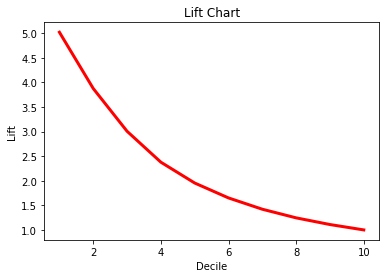

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ks.decile, ks.Lift, color='red', linewidth=3)
#ax.bar(ks.decile,ks.Lift,color='blue')
ax.set(title='Lift Chart', ylabel='Lift', xlabel='Decile')
plt.show()